In [1]:
import pandas as pd
url = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/main/PowerPlant.csv"
df = pd.read_csv(url)
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [3]:
df.isna().sum()

,0
AT,0
V,0
AP,0
RH,0
PE,0


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AT,9568.0,19.651231,7.452473,1.81,13.5100,20.345,25.72,37.11
V,9568.0,54.305804,12.707893,25.36,41.7400,52.080,66.54,81.56
AP,9568.0,1013.259078,5.938784,992.89,1009.1000,1012.940,1017.26,1033.30
RH,9568.0,73.308978,14.600269,25.56,63.3275,74.975,84.83,100.16
PE,9568.0,454.365009,17.066995,420.26,439.7500,451.550,468.43,495.76


In [5]:
X = df.drop(columns=['PE'])
Y = df[['PE']]

In [6]:
X.head()

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20


In [7]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [8]:
num_pipe = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')),
                           ('scaler', StandardScaler())]).set_output(transform='pandas')

In [9]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,AT,V,AP,RH
0,-1.517862,-1.065205,-0.407357,1.143944
1,0.535255,0.329277,-0.313057,0.061031
2,1.353818,0.204151,-1.028729,-2.150688
3,-0.077996,-0.363242,-1.016941,0.238434
4,-1.053562,-1.073861,0.651838,1.636427


In [10]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.2, random_state=42)

In [11]:
xtrain.head()

,AT,V,AP,RH
5487,0.749961,0.721180,-0.329896,-0.486248
3522,0.864023,1.266539,-0.984946,0.826125
6916,0.936486,1.524659,0.318419,0.809686
7544,1.665141,1.380647,-0.902434,-1.155449
7600,1.214260,1.364121,-1.035464,-0.236924


In [12]:
ytrain.head()

,PE
5487,442.75
3522,432.52
6916,428.80
7544,426.07
7600,436.58


In [13]:
xtest.head()

,AT,V,AP,RH
2513,1.348451,0.239564,-1.284687,-1.093118
9411,0.813030,1.364121,-0.742460,0.274052
8745,-0.244392,-0.738619,1.983830,-0.186923
9085,-1.367568,-1.015627,2.276835,0.977500
4950,1.375289,0.825058,0.613107,-1.717111


In [14]:
ytest.head()

,PE
2513,433.27
9411,438.16
8745,458.42
9085,480.82
4950,441.41


In [15]:
xtrain.shape

(7654, 4)

In [16]:
xtrain.shape[1]

4

In [17]:
from keras.models import Sequential
from keras.layers import Input, Dense

In [18]:
# Initialize the model
model = Sequential()

# Add input layer
model.add(Input(shape=(xtrain.shape[1],)))
# Add Hidden Layer 1
model.add(Dense(units=64, activation='relu'))
# Add Hidden Layer 2
model.add(Dense(units=32, activation='relu'))
# Add Output Layer
model.add(Dense(units=1, activation='linear'))

In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,433 (9.50 KB)

 Trainable params: 2,433 (9.50 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

In [21]:
hist = model.fit(xtrain, ytrain, validation_split=0.2, epochs=50)

Epoch 1/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 200321.6406 - mae: 446.9348 - val_loss: 119888.6484 - val_mae: 343.4102
Epoch 2/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 76857.7891 - mae: 258.6872 - val_loss: 17142.4688 - val_mae: 111.4779
Epoch 3/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 14972.2939 - mae: 103.7709 - val_loss: 7992.6074 - val_mae: 75.2794
Epoch 4/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6467.8428 - mae: 66.8671 - val_loss: 3197.5322 - val_mae: 46.8186
Epoch 5/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2609.3691 - mae: 41.7256 - val_loss: 1396.6866 - val_mae: 29.8408
Epoch 6/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1203.9637 - mae: 27.5289 - val_loss: 755.8815 - val_mae: 21.5235
Epoch 7/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 677.1035 - mae: 20.1782 - val_loss: 458.6813 - val_mae: 16.5015
Epoch 8/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 434.6667 - mae: 15.8492 - val_loss: 301.9828 - va

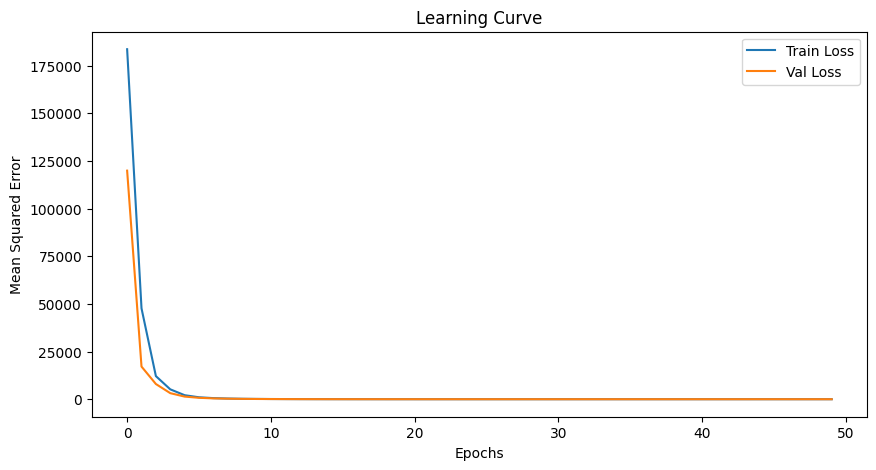

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(hist.history['loss'], label='Train Loss')
plt.plot(hist.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curve')
plt.legend()
plt.show()

In [23]:
model.evaluate(xtrain, ytrain)

240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 19.6091 - mae: 3.5101


[19.501310348510742, 3.4657156467437744]

In [24]:
model.evaluate(xtest, ytest)

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17.5855 - mae: 3.3219


[17.744403839111328, 3.3116672039031982]

In [25]:
ypred_train = model.predict(xtrain)
ypred_test = model.predict(xtest)

240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 850us/step


In [26]:
ypred_train[0:5]

array([[440.78345],
       [433.67853],
       [433.56403],
       [430.6425 ],
       [432.2248 ]], dtype=float32)

In [27]:
ytrain.head()

,PE
5487,442.75
3522,432.52
6916,428.80
7544,426.07
7600,436.58


In [28]:
ypred_test[0:5]

array([[435.58246],
       [435.3817 ],
       [460.70184],
       [474.59247],
       [436.77533]], dtype=float32)

In [29]:
ytest.head()

,PE
2513,433.27
9411,438.16
8745,458.42
9085,480.82
4950,441.41


In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def evaluate_model(model, x, y):
  ypred = model.predict(x)
  mse = mean_squared_error(y, ypred)
  rmse = mse**(1/2)
  mae = mean_absolute_error(y, ypred)
  r2 = r2_score(y, ypred)
  print(f'Mean Squared Error : {mse:.2f}')
  print(f'Root Mean Squared Error : {rmse:.2f}')
  print(f'Mean Absolute Error : {mae:.2f}')
  print(f'R2 score : {r2:.4f}')

In [31]:
evaluate_model(model, xtrain, ytrain)

240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Mean Squared Error : 19.50
Root Mean Squared Error : 4.42
Mean Absolute Error : 3.47
R2 score : 0.9333


In [32]:
evaluate_model(model, xtest, ytest)

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 879us/step
Mean Squared Error : 17.74
Root Mean Squared Error : 4.21
Mean Absolute Error : 3.31
R2 score : 0.9380


In [33]:
model.save('PowerPlantReg.keras')

In [34]:
from keras.models import load_model
m = load_model('/content/PowerPlantReg.keras')
m.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,301 (28.52 KB)

 Trainable params: 2,433 (9.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,868 (19.02 KB)